<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
data = []
with open('sat_scores.csv') as csvfile:
    table = csv.reader(csvfile)
    for row in table:
        data.append(row)
        
def convert_to_dict(data):
    heading = data[0]
    stats = data[1:]
    data_dict = {}
    for index, name in enumerate(heading):
        data_dict[name] = [row[index] for row in stats]
    return data_dict
        
print convert_to_dict(data)


{'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', 

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

#### If loaded from file, columns with numeric values will be converted to int64. The Dataframe loaded from the dictionary did not convert the string column values to an integer or float and are of type object. ####

In [3]:
sat = pd.DataFrame(convert_to_dict(data))
sat.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object

In [4]:
data = 'sat_scores.csv'
df = pd.read_csv(data)
df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
state = 'two letter abbreviation of the states.'
rate = 'participation rate in each state'
verbal = 'Average Verbal Score for SAT'
math = 'Average Math Score for SAT'

In [6]:
df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [7]:
shape = df.shape
description = [math, rate, state, verbal] 
var_names = df.dtypes.to_dict().keys()
var_type = df.dtypes.to_dict().values()
keys = ['names', 'types', 'description', 'shape']
values = [var_names, var_type, description, shape]
data_dict = dict(zip(keys,values))
pprint(data_dict)

{'description': ['Average Math Score for SAT',
                 'participation rate in each state',
                 'two letter abbreviation of the states.',
                 'Average Verbal Score for SAT'],
 'names': ['Math', 'State', 'Rate', 'Verbal'],
 'shape': (52, 4),
 'types': [dtype('int64'), dtype('O'), dtype('int64'), dtype('int64')]}


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [9]:
df_edit = df.iloc[:51]

Text(0.5,0,u'Math Scores')

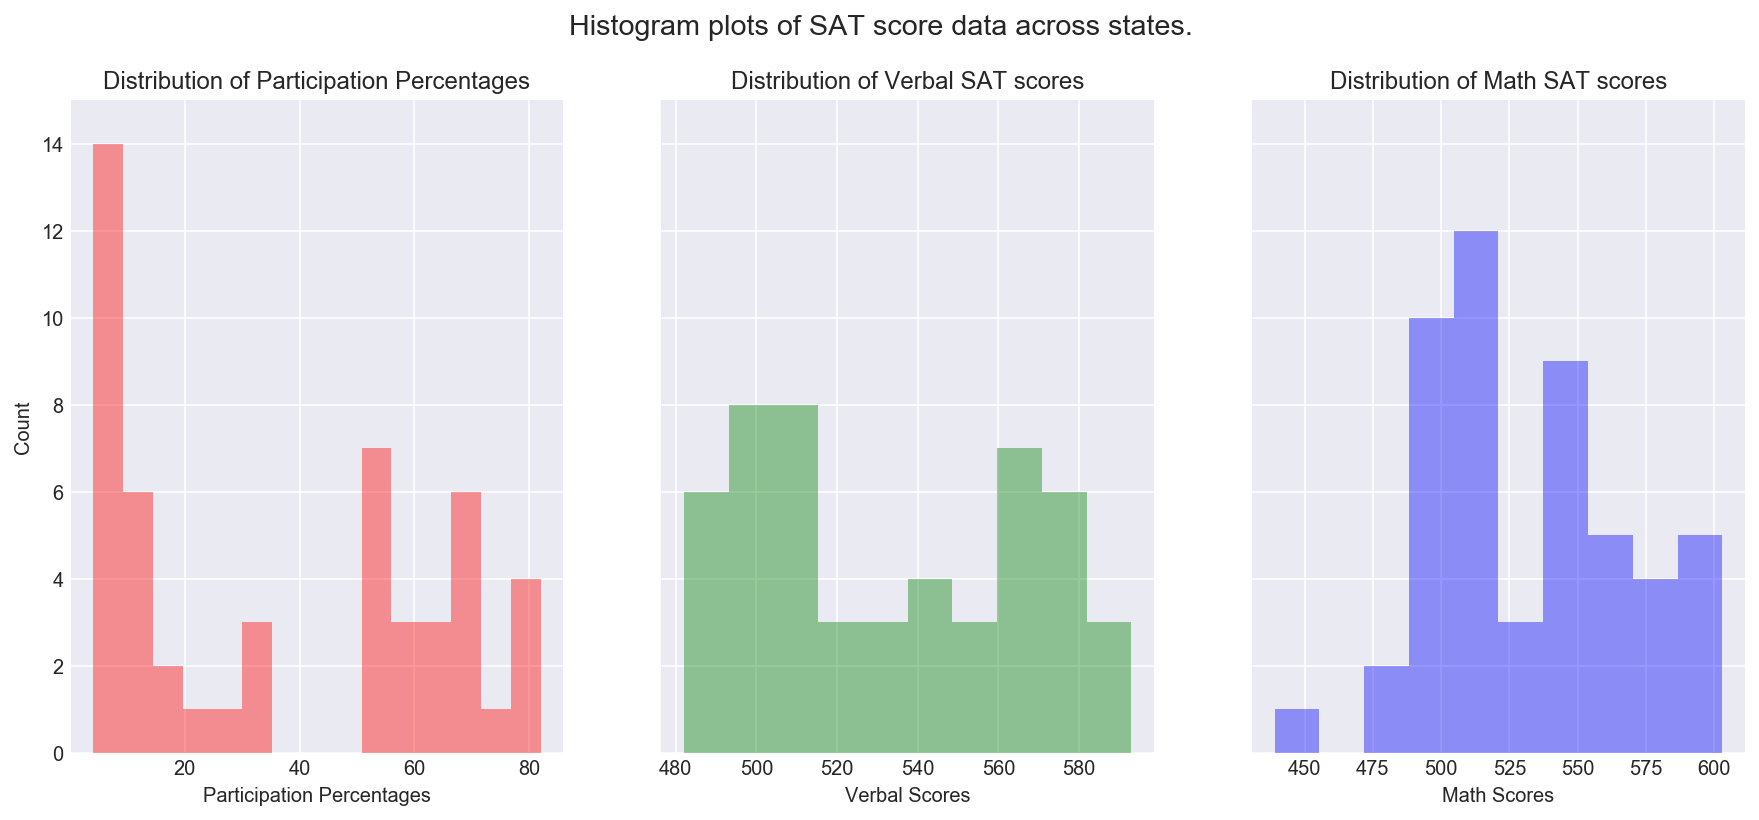

In [45]:
fig, ax = plt.subplots(1,3,figsize=(15,6),sharey=True)
fig.suptitle("Histogram plots of SAT score data across states.", fontsize="x-large")

ax[0].set_ylabel("Count") 
plt.ylim(0,15)

sns.distplot(df_edit["Rate"],kde=False, ax=ax[0], bins=15, color='r')
ax[0].set_title("Distribution of Participation Percentages")
ax[0].set_xlabel("Participation Percentages")

sns.distplot(df_edit["Verbal"], kde=False, ax=ax[1], bins=10,color='g')
ax[1].set_title("Distribution of Verbal SAT scores")
ax[1].set_xlabel("Verbal Scores") 

sns.distplot(df_edit["Math"], kde=False, ax=ax[2],bins=10,color='b')
ax[2].set_title("Distribution of Math SAT scores")
ax[2].set_xlabel("Math Scores")


### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

#### There is a negative correlation between participation rate and Verbal and Math scores. (ie. scores increase as participation rate of states decrease. There is a positive correlation between Math and Verbal scores, suggesting that students who do well in Math tend to do as well in Verbal. There is one outlier, where a state has students with Math scores in the lower percentile but Verbal scores are close to average.

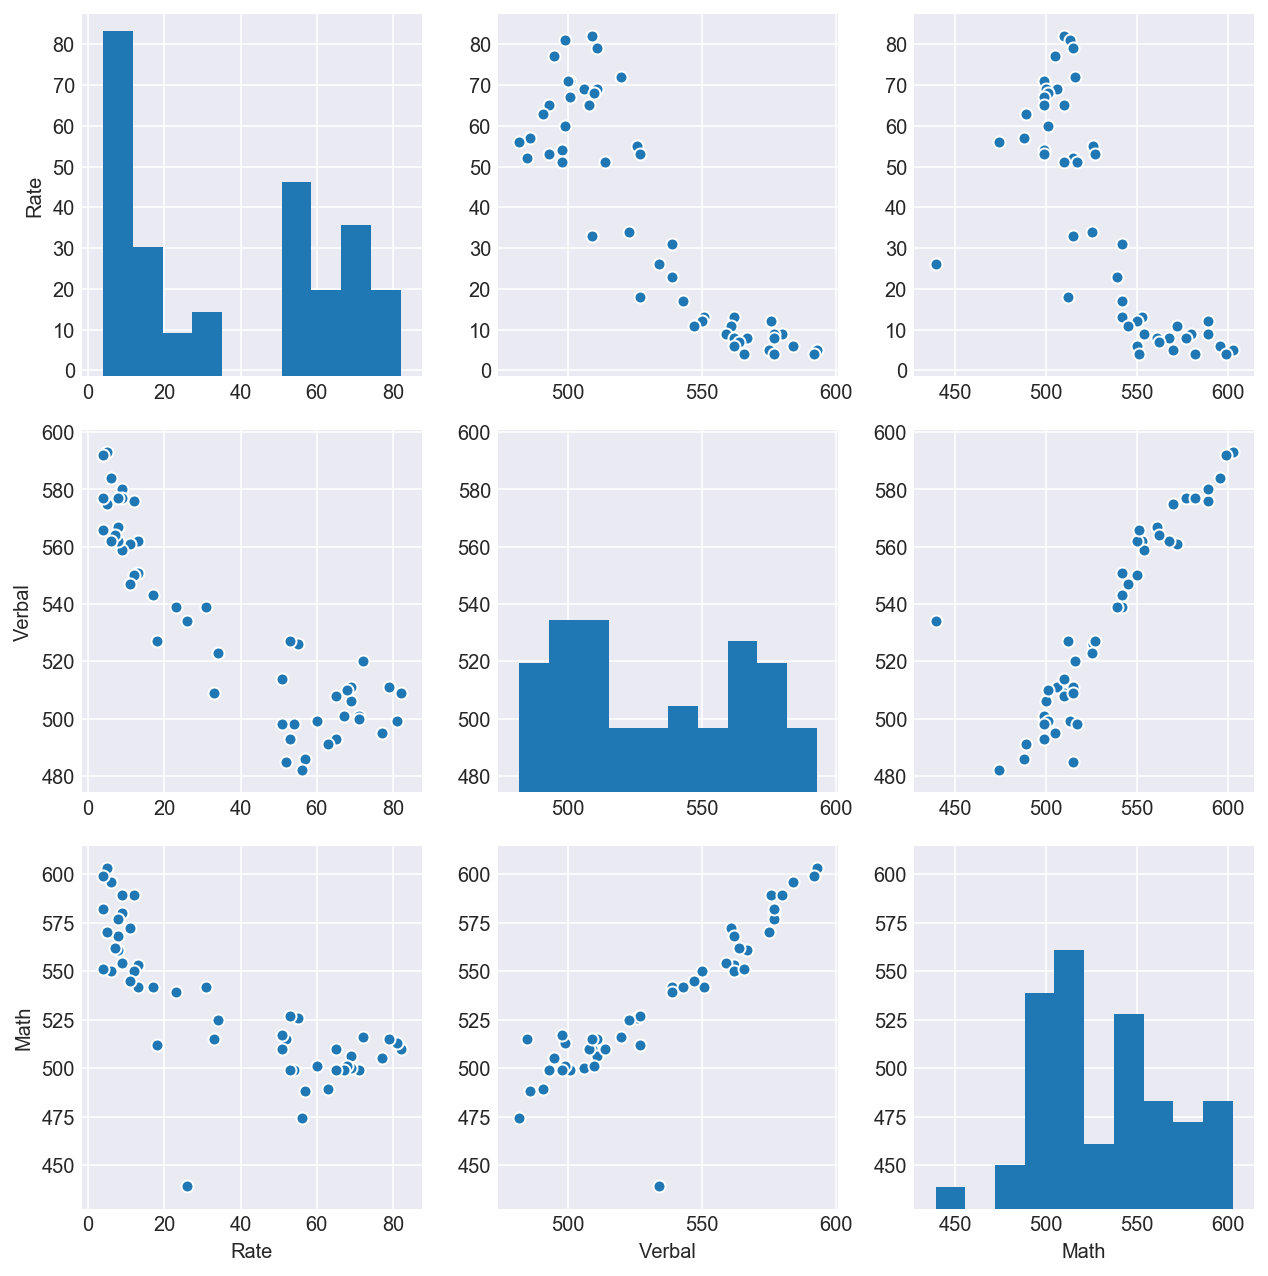

In [11]:
df_pairplot = sns.pairplot(df_edit,size=3)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

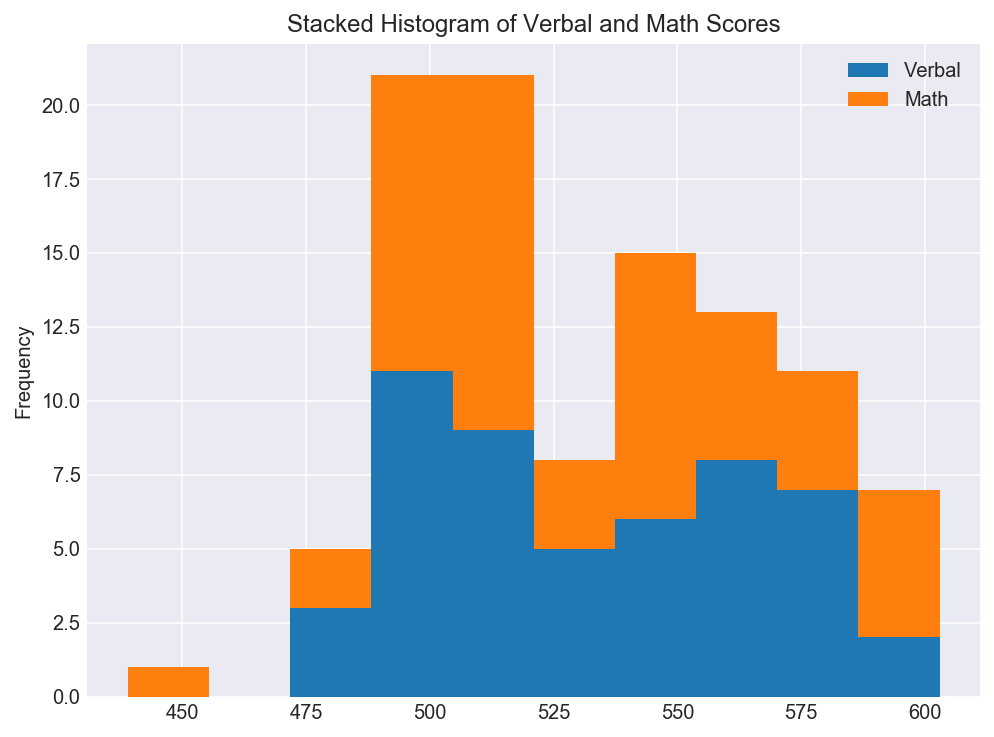

In [12]:
df_edit[['Verbal', 'Math']].plot(kind='hist', stacked=True, figsize=(8,6), title='Stacked Histogram of Verbal and Math Scores')

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

#### The range of Math and Verbal scores is much larger than that of Rate, which causes box-plot of range to be compressed.

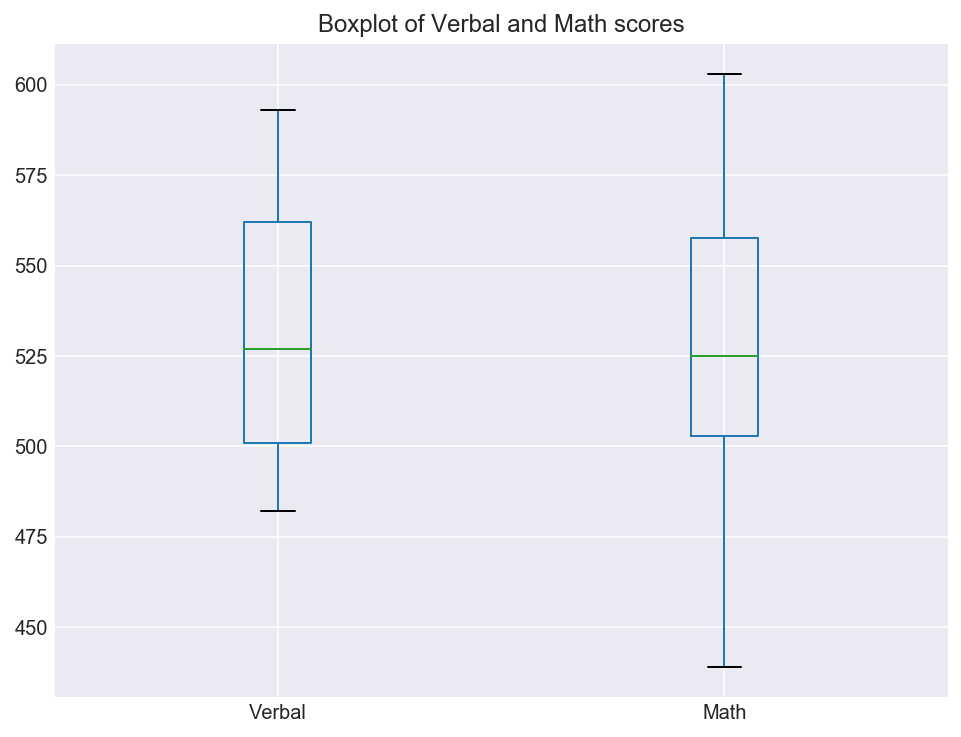

In [13]:
df_edit[['Verbal', 'Math']].plot(kind='box', figsize=(8,6), title='Boxplot of Verbal and Math scores')

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


#### Rescale the variables using a procedure called "standardization", which forces the distribution of each variable to have a mean of 0 and a standard deviation of 1.

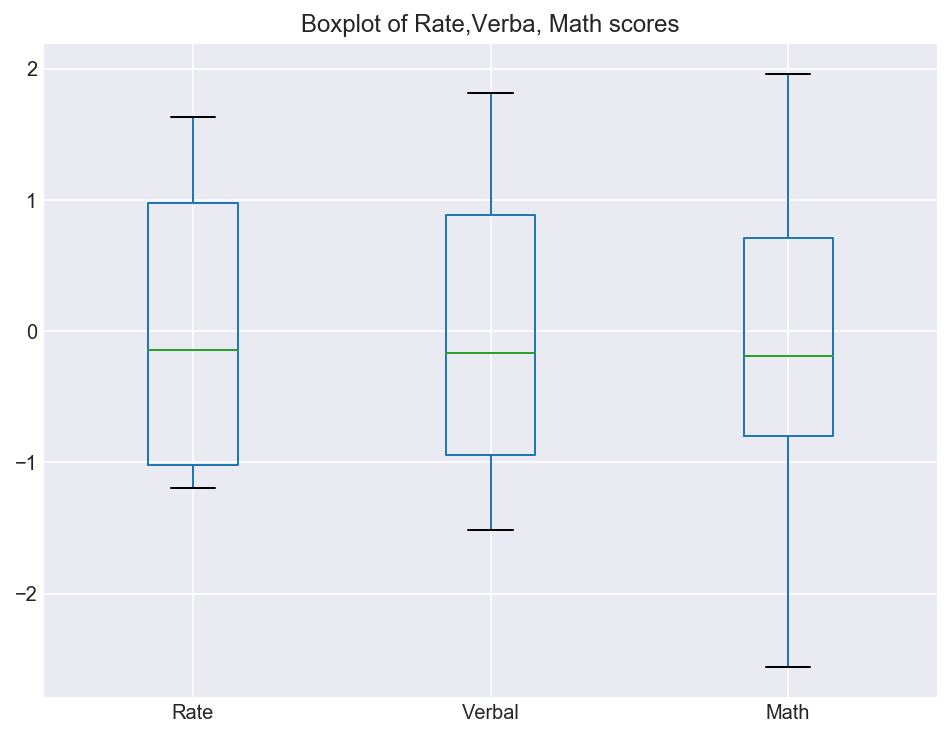

In [46]:
rescale =  lambda x: (x - x.mean()) / x.std()
df_edit[['Rate','Verbal', 'Math']].apply(rescale).plot(kind='box', figsize=(8,6), title='Boxplot of Rate,Verba, Math scores')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




#### There are almost the same number of states above the mean and below the mean, suggesting a normal distribution with no outliers skewing the mean.

In [15]:
print df_edit['Verbal'].mean()

verbal_abv_mean = df_edit.loc[(df_edit['Verbal'] > df_edit['Verbal'].mean()), 'State']
print str(verbal_abv_mean.count()) + " states above the mean."                      

verbal_below_mean = df_edit.loc[(df_edit['Verbal'] < df_edit['Verbal'].mean()), 'State']
print str(verbal_below_mean.count()) + " states below the mean."                      

532.529411765
24 states above the mean.
27 states below the mean.


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

#### Data is slightly skewed to the left as the mean is larger than the median. The closeness of mean and median values suggest that that there are no outliers. There are 2 states with Verbal scores exactly at the median, which explains why there are lesser states above the median than below the median ####

In [16]:
print df_edit['Verbal'].median()

verbal_abv_median = df_edit.loc[(df_edit['Verbal'] > df_edit['Verbal'].median()), 'State']
print str(verbal_abv_median.count()) + " states above the median." 

verbal_abv_median = df_edit.loc[(df_edit['Verbal'] < df_edit['Verbal'].median()), 'State']
print str(verbal_abv_median.count()) + " states below the median." 

verbal_abv_median = df_edit.loc[(df_edit['Verbal'] == df_edit['Verbal'].median()), 'State']
print str(verbal_abv_median.count()) + " states at the median." 

#df_edit.sort_values('Verbal', ascending=True)

527.0
24 states above the median.
25 states below the median.
2 states at the median.


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [47]:
df_edit['Difference'] = df_edit['Verbal'] - df_edit['Math']
df_edit.head()

,State,Rate,Verbal,Math,Difference,percentile
0,CT,82,509,510,-1,100.000000
1,NJ,81,499,513,-14,98.039216
2,MA,79,511,515,-4,96.078431
3,NY,77,495,505,-10,94.117647
4,NH,72,520,516,4,92.156863


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [18]:
v_m = df_edit[df_edit['Difference'] > 0]
ranking = v_m.sort_values("Difference", ascending=False).iloc[:10]
ranking.head(3)

,State,Rate,Verbal,Math,Difference
27,OH,26,534,439,95
29,WV,18,527,512,15
50,MS,4,566,551,15


In [19]:
m_v = df_edit[df_edit['Difference'] < 0]
ranking = m_v.sort_values("Difference", ascending=True).iloc[:10]
ranking.head(3)

,State,Rate,Verbal,Math,Difference
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


#### The correlation matrix verifies my observations from the pairplot above. There is a negative correlation between Rate and Verbal and Math scores and positive correlation between Verbal and Math scores.

In [20]:
df_edit.corr()

,Rate,Verbal,Math,Difference
Rate,1.000000,-0.888121,-0.773419,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.044527
Math,-0.773419,0.899909,1.000000,-0.395574
Difference,-0.098671,0.044527,-0.395574,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

* count: sample size
* mean: The mean is the sum of the numbers in a list, divided by the length of that list. (average)
* std: The standard deviation is the square root of the variance. Because the variance is the average of the distances from the mean squared, the standard deviation tells us approximately, on average, the distance of numbers in a distribution from the mean of the distribution
* min: The lowest number in a range
* 25%: The value below which 25% of the observations may be found (Eg. for Verbal scores, 25% of students who participated in SAT had a score equal to or less than 501)
* 50%: The value below which 50% of the observations may be found
* 75%: The value below which 75% of the observations may be found
* max: The highest number in a range

In [21]:
df_edit.describe()

,Rate,Verbal,Math,Difference
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

#### The covariance matrix is different from the correlation matrix in that it is not normalised by the standard deviations of the 2 variables being compared. While the correlation matrix values lie between -1 and 1, the covariance values can exceed this scale.

#### Converting the covariance to the correlation: Divide the covariance by the standard deviations of the two variables.

#### The correlation matrix is preferred as it is dimensionless and scaled such that it ranges from -1 to 1, which makes its easier to make inferences from data based on visual observations.

In [22]:
df_edit.cov()

,Rate,Verbal,Math,Difference
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
Difference,-43.06,23.529412,-227.370196,250.899608


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [23]:
df = pd.read_csv('drug-use-by-age.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

#### Yes, this data requires cleaning. Columns concaine-frequency, crack-frequency, heroin-freuquency, inhalent-frequency, oxycontin-releiver-frequency and meth-frequency have blank rows. I will replace the "-" with 0 for these rows and cast all the values as float.

In [24]:
drugs = df.replace('-', '0').apply(pd.to_numeric, errors='ignore')

In [25]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

#### Example:
- alcohol-use: Percentage of those in an age group who used alcohol in the past 12 months
- alcohol-frequency: Median number of times a user in an age group used alcohol in the past 12 months

In [26]:
use = drugs.iloc[:,0::2].set_index("age")
use.head()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
age,,,,,,,,,,,,,
12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


In [27]:
frequency = pd.concat([drugs.iloc[:,0], drugs.iloc[:,3::2]], axis=1).set_index("age")
frequency.head()

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
age,,,,,,,,,,,,,
12,3.0,4.0,5.0,0.0,35.5,52.0,19.0,36.0,24.5,52.0,2.0,0.0,13.0
13,6.0,15.0,1.0,3.0,0.0,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
14,5.0,24.0,5.5,0.0,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
15,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
16,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0


- Heroin and marijuana has the highest frequency of use
- "19" age group and "35-49" age group contribute to the peaks of alcohol and marijuana frequency of use

In [28]:
frequency.describe().sort_values('mean', axis=1, ascending=False)

,heroin-frequency,marijuana-frequency,alcohol-frequency,meth-frequency,stimulant-frequency,sedative-frequency,pain-releiver-frequency,oxycontin-frequency,crack-frequency,tranquilizer-frequency,hallucinogen-frequency,cocaine-frequency,inhalant-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,68.970588,42.941176,33.352941,31.735294,31.147059,19.382353,14.705882,13.941176,12.382353,11.735294,8.411765,7.411765,5.794118
std,70.153285,18.362566,21.318833,32.206423,85.973790,24.833527,6.935098,12.902134,17.361532,11.485205,15.000245,8.014119,4.937291
min,0.000000,4.000000,3.000000,0.000000,2.000000,3.000000,7.000000,0.000000,0.000000,4.500000,2.000000,0.000000,0.000000
25%,35.500000,30.000000,10.000000,10.500000,7.000000,6.500000,12.000000,5.000000,2.000000,6.000000,3.000000,5.000000,3.000000
50%,50.000000,52.000000,48.000000,24.000000,10.000000,10.000000,12.000000,12.000000,6.000000,10.000000,3.000000,5.000000,4.000000
75%,66.500000,52.000000,52.000000,46.000000,12.000000,17.500000,15.000000,17.500000,15.000000,11.000000,4.000000,7.000000,5.500000
max,280.000000,72.000000,52.000000,105.000000,364.000000,104.000000,36.000000,46.000000,62.000000,52.000000,52.000000,36.000000,19.000000


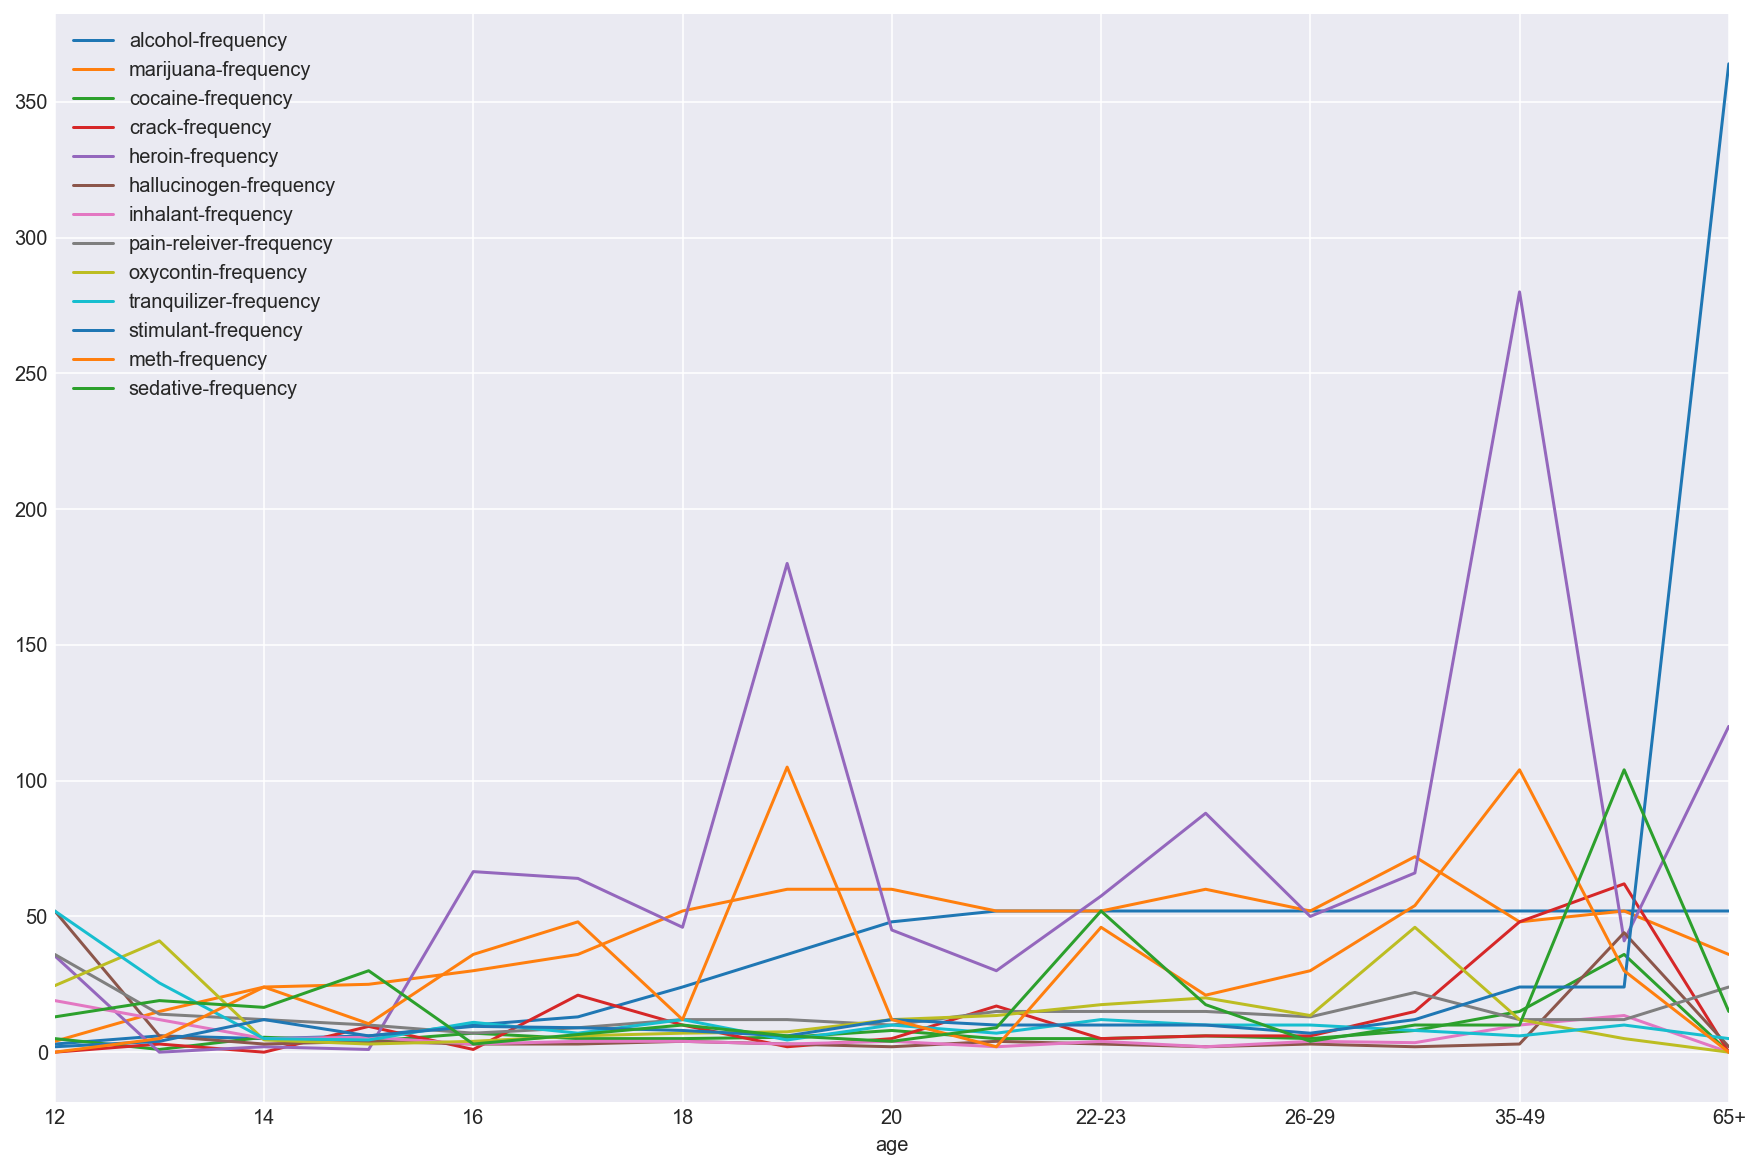

In [29]:
frequency.plot(figsize=(15,10), legend=True)

- Alcohol and marijuana has the highest use 
- "22 to 23" age group has the highest alcohol use
- "18" age group has the highest marijuana use

In [30]:
use.describe().sort_values('mean', axis=1, ascending=False)

,alcohol-use,marijuana-use,pain-releiver-use,hallucinogen-use,tranquilizer-use,cocaine-use,stimulant-use,inhalant-use,oxycontin-use,meth-use,heroin-use,crack-use,sedative-use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,55.429412,18.923529,6.270588,3.394118,2.805882,2.176471,1.917647,1.388235,0.935294,0.382353,0.352941,0.294118,0.282353
std,26.878866,11.959752,3.166379,2.792506,1.753379,1.816772,1.407673,0.927283,0.608216,0.262762,0.333762,0.235772,0.138000
min,3.900000,1.100000,0.600000,0.100000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.100000,8.700000,3.900000,0.600000,1.400000,0.500000,0.600000,0.600000,0.400000,0.200000,0.100000,0.000000,0.200000
50%,64.600000,20.800000,6.200000,3.200000,3.500000,2.000000,1.800000,1.400000,1.100000,0.400000,0.200000,0.400000,0.300000
75%,77.500000,28.400000,9.000000,5.200000,4.200000,4.000000,3.000000,2.000000,1.400000,0.600000,0.600000,0.500000,0.400000
max,84.200000,34.000000,10.000000,8.600000,5.400000,4.900000,4.100000,3.000000,1.700000,0.900000,1.100000,0.600000,0.500000


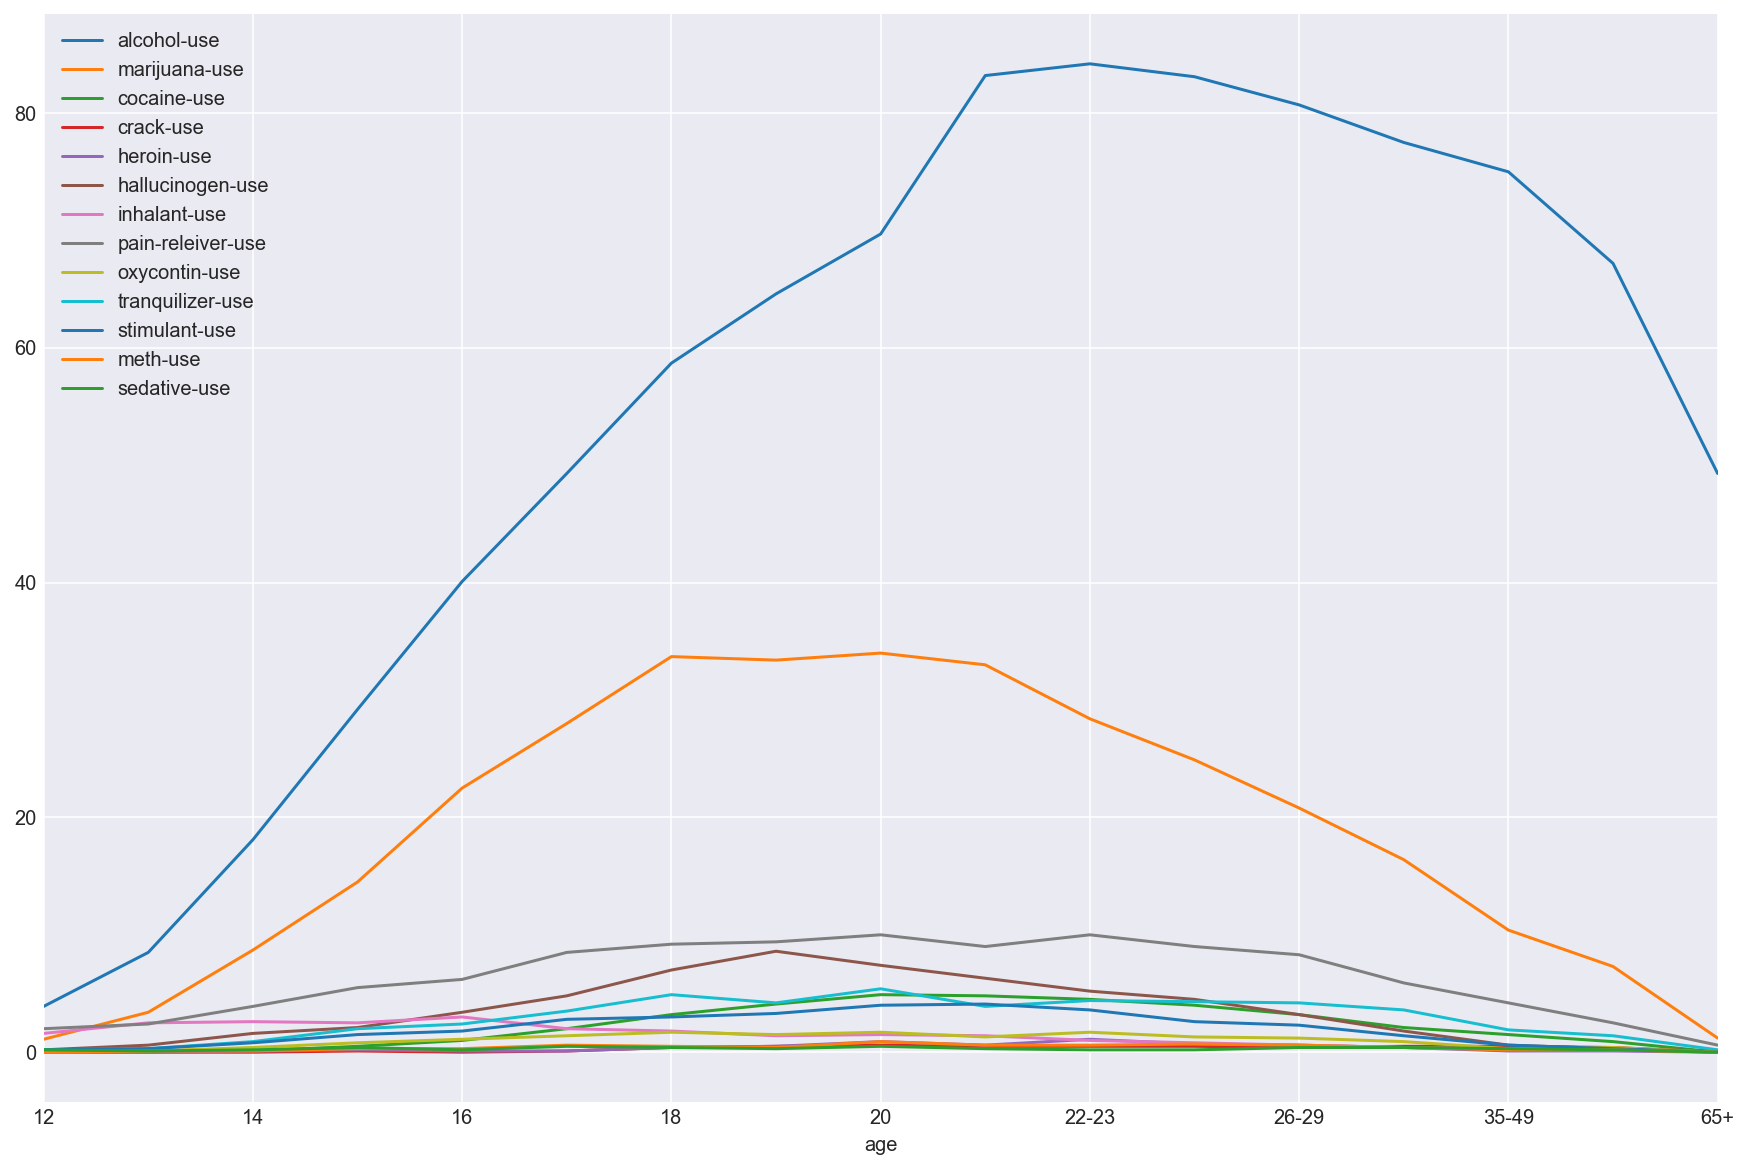

In [31]:
use.plot(figsize=(15,10), legend=True)

Text(0.5,0,u'Age Group')

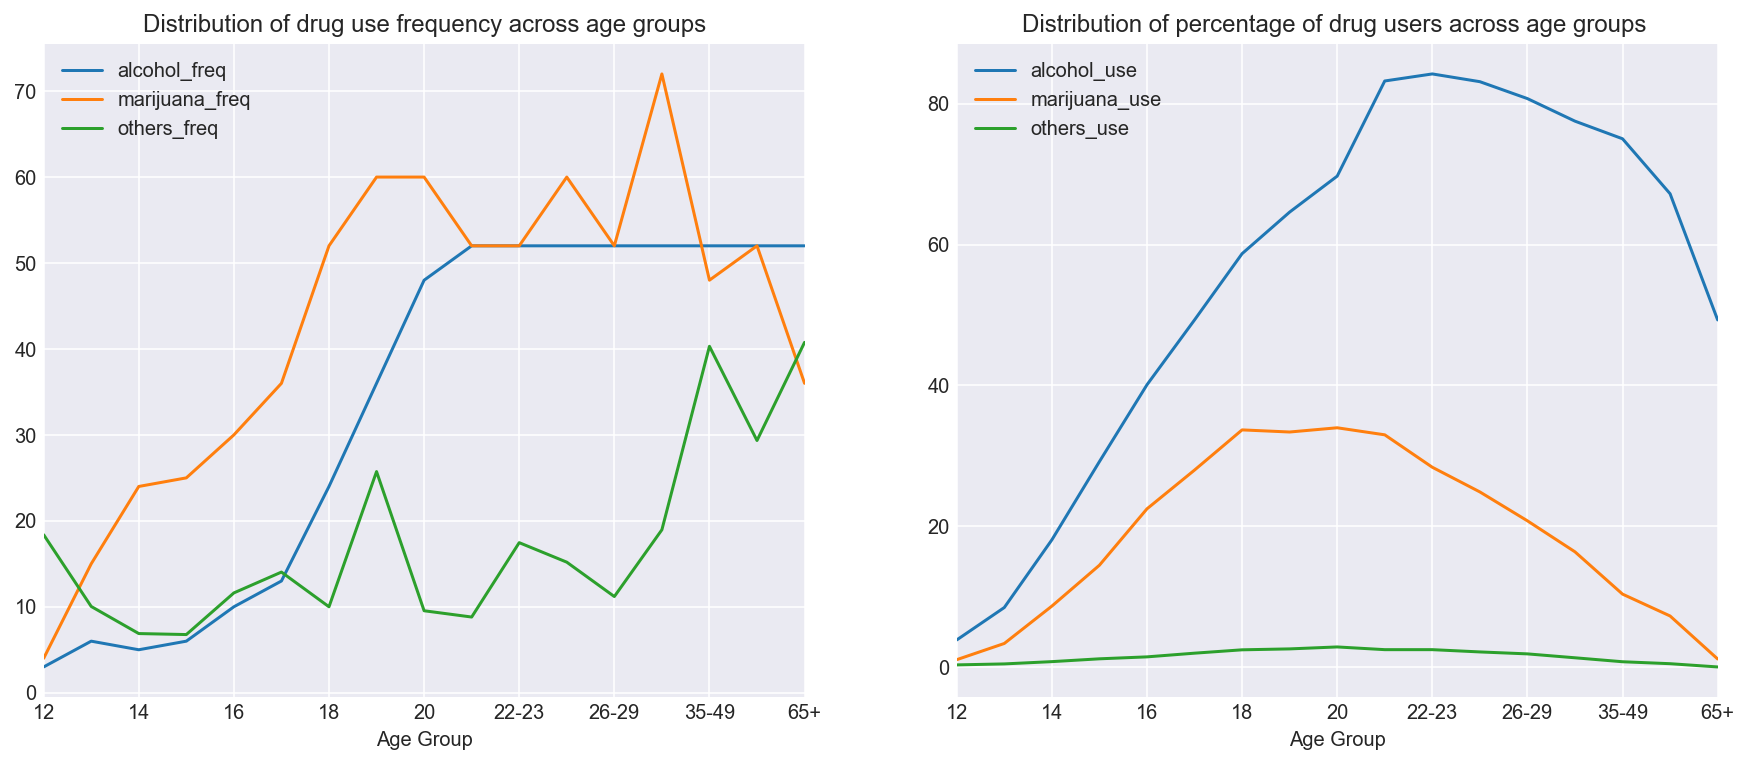

In [32]:
combined_freq = pd.DataFrame()
combined_freq["alcohol_freq"] = frequency['alcohol-frequency']
combined_freq["marijuana_freq"] = frequency['marijuana-frequency']
combined_freq["others_freq"] = (frequency.drop(['alcohol-frequency','marijuana-frequency'], axis=1).sum(axis=1))/len(frequency.columns)

combined_use = pd.DataFrame()
combined_use["alcohol_use"] = use['alcohol-use']
combined_use["marijuana_use"] = use['marijuana-use']
combined_use["others_use"] = (use.drop(['alcohol-use','marijuana-use'], axis=1).sum(axis=1))/len(use.columns)

fig, ax = plt.subplots(1,2,figsize=(15,6))

combined_freq.plot(ax=ax[0], legend=True)
ax[0].set_title("Distribution of drug use frequency across age groups")
ax[0].set_xlabel("Age Group")

combined_use.plot(ax=ax[1], legend=True)
ax[1].set_title("Distribution of percentage of drug users across age groups ")
ax[1].set_xlabel("Age Group") 


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

### NULL HYPOTHESIS: There is no significant difference between the frequency of marijuana use among users in  50-64 age group (baby boomers) and 18-34 age group (millenials).

In [49]:
marijuana = pd.DataFrame()
marijuana["18_30-34"] = combined_freq.loc["18":"30-34","marijuana_freq"]
marijuana["50_64"] = combined_freq.loc["50-64","marijuana_freq"]
print marijuana["18_30-34"].mean()
print marijuana["50_64"].mean()

57.5
52.0


In [51]:
stats.ttest_ind(marijuana["18_30-34"], marijuana["50_64"])

Ttest_indResult(statistic=2.2000000000000002, pvalue=0.045100295817592458)

**Report**



...

### After performing t-test on the 2 groups to evaluate the null hypothesis, the t-statisic is 2.2 and p-value is 0.0451. Since p-value is less than 0.05 (95% confidence level), we reject the null hypothesis.
### From the results, we can make an inference that the marijuana use patterns of millenials and baby boomers are similar.  As marijuana is considered to be a drug popular among youths since the 1960s to present, the hypothesis test results mean that Americans could be carrying their youth drug habits with them even as they reach middle age.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [35]:
df_edit[['Rate']].head()

,Rate
0,82
1,81
2,79
3,77
4,72


### To identifying extreme values in the tails of the distribution:
- lower inner fence: Q1 - 1.5*IQR
- upper inner fence: Q3 + 1.5*IQR
- lower outer fence: Q1 - 3*IQR
- upper outer fence: Q3 + 3*IQR

#### A point beyond an inner fence on either side is considered a mild outlier. A point beyond an outer fence is considered an extreme outlier.

In [36]:
verbal75, verbal25 = np.percentile(df_edit['Verbal'], [75 ,25])
iqrverbal = verbal75 - verbal25        
verbalmin = verbal25-(iqrverbal*1.5)   
verbalmax = verbal75+(iqrverbal*1.5)   

math75, math25 = np.percentile(df_edit['Math'], [75 ,25])
iqrmath = math75 - math25
mathmin = math25-(iqrmath*1.5)
mathmax = math75+(iqrmath*1.5)

In [37]:
check_outliers = pd.DataFrame()
check_outliers["more_verbalmax"] = df_edit["Verbal"] > verbalmax
check_outliers["less_verbalmin"] = df_edit["Verbal"] < verbalmin
check_outliers["more_mathmax"] = df_edit["Math"] > mathmax
check_outliers["less_mathmin"] = df_edit["Math"] < mathmin
check_outliers.sum()

more_verbalmax    0
less_verbalmin    0
more_mathmax      0
less_mathmin      0
dtype: int64

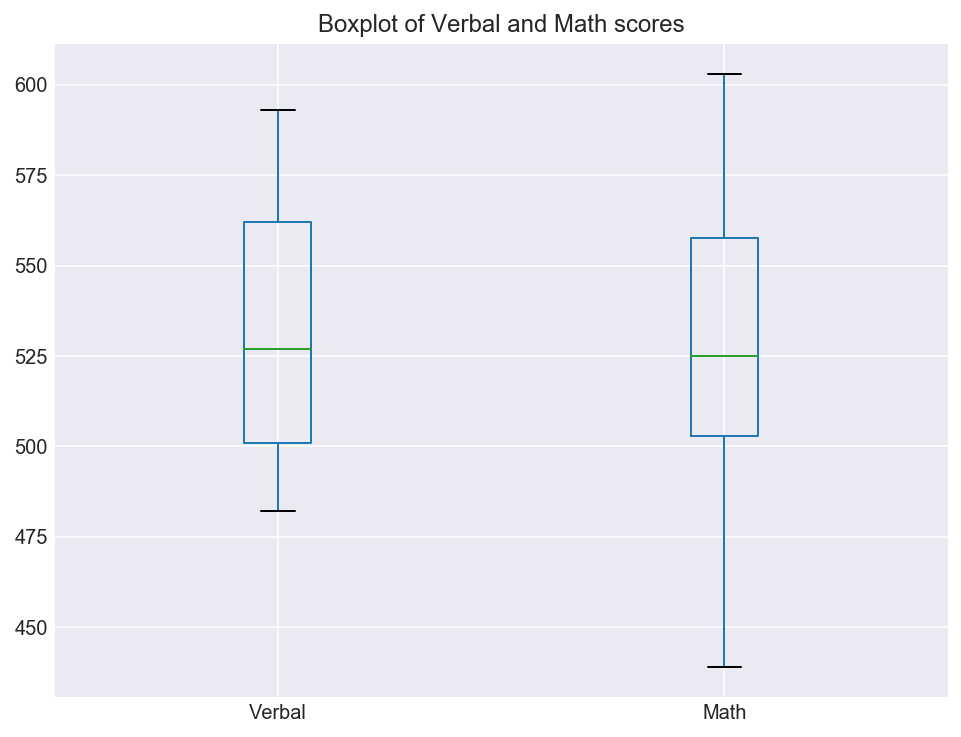

In [38]:
df_edit[['Verbal', 'Math']].plot(kind='box', figsize=(8,6), title='Boxplot of Verbal and Math scores')

### The boxplot verifies that there are no outliers, as there are no points outside either end of the plot

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
#### The Pearson correlation evaluates the linear relationship between two continuous variables, while the spearman correlation evaluates the monotonic relationship (ie. direction of change never changes) between two continuous or ordinal variables.

#### The Pearson correlation of 0.899 indicates a strong positive correlation between Verbal and Math. Per
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!
  
  
- Rank the verbal scores and math scores. Ranking is achieved by giving the ranking '1' to the biggest number in a column, '2' to the second biggest value and so on. The smallest value in the column will get the lowest ranking.
- Calculate the difference in ranking between verbal and math score.
- Find the difference in the ranks (d): This is the difference between the ranks of the two values on each row of the table. 
- Square the differences (d²) to remove negative values and then sum them 
- Find the number of measurements taken (n).
- Place the variables d² and n into the spearman rank correlation formula.

In [39]:
df_edit[["Verbal", "Math"]].corr(method='pearson')

,Verbal,Math
Verbal,1.000000,0.899909
Math,0.899909,1.000000


In [40]:
df_edit[["Verbal", "Math"]].corr(method='spearman')

,Verbal,Math
Verbal,1.000000,0.909413
Math,0.909413,1.000000


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [41]:
df_edit['percentile'] = df_edit['Rate'].apply(lambda x: stats.percentileofscore(df_edit['Rate'],x))
df_edit.loc[(df_edit['State'] == 'CA'),'percentile']

23    55.882353
Name: percentile, dtype: float64

#### Both use the concept of 'ranking'. Percentile indicates where in a sorted series of values you can find the value. This way of sorting values before assigning a percentile score is similar to the method of determining the Spearman Rank correlation where the raw scores are ranked before calculating the difference in ranks.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

####  Percentile scoring ranks the scores relative to each other. Outliers are more easily noticeable as it is easier to compare the distance between scores based on a percentile score graph. 

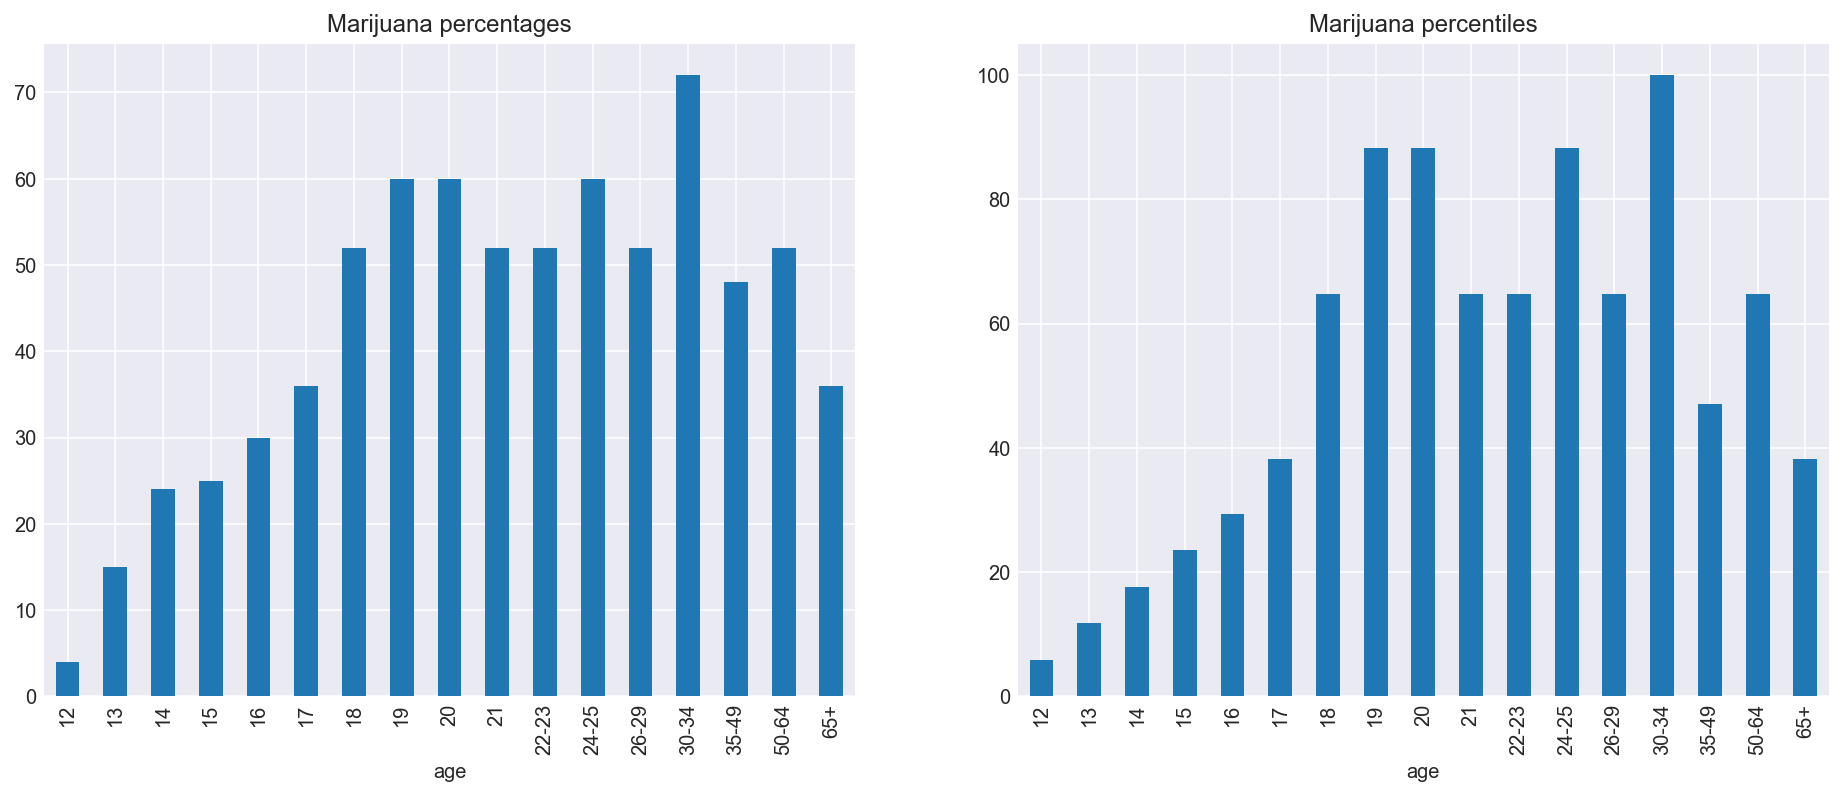

In [43]:
frequency['percentile'] = frequency['marijuana-frequency'].apply(lambda x: stats.percentileofscore(frequency['marijuana-frequency'],x))
fig, ax = plt.subplots(1,2, figsize=(16,6))
frequency['marijuana-frequency'].plot(kind='bar', ax=ax[0], title='Marijuana percentages')
frequency['percentile'].plot(kind='bar', ax=ax[1], title='Marijuana percentiles')

#### Effect of converting raw scores to percentils:
-  Scale of the y-axis changes. Y-axis ticks on left plot correspond to the frequeny score(median number of times a user in an age group used marijuana), whereas y-axis ticks on percentile plot correspond to the percentile rank from 0 to 100.
- Age group 30-34 is at the 100th percentile, meaning that no other age group has a frequency score greater than it.